# Lab 4: CCD Characterization
Carter Merrill
Astro 480

___


### Gain and Read Noise

The reported gain for the ST-10 is 1.3e<sup>-</sup>/ADU

Because none of the flats are exposed for the same duration, to calculate the gain, I will need to use two regions from the same exposure.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

We can inspect all of the images by looking at their headers.

In [2]:
imageList = glob.glob('data/Lab4/*.fits*') 
imageData = [fits.open(a) for a in imageList]
keys = list(imageData[0][0].header.keys())

dic = {'Files' : imageList}

for i in keys[9:-15]: # Choose the columns you care about
    dic.update( {i : [a[0].header[i] for a in imageData]} )

imageInfo = pd.DataFrame(data = dic) # Making it a dataframe makes it easier to look at

The above cell takes all of the information from the headers of all the files in the data/ folder and puts them in a dataframe so they can all be inspected at once

In [3]:
imageInfoSorted = imageInfo.sort_values(['EXPTIME']) # We really are interested in if any of the flats have the same exposure time
imageInfoSorted

,Files,DATE-OBS,INSTRUME,EXPTIME,CCD-TEMP,IMAGETYP,CFWHEEL
11,data/Lab4/480_2018_.Bias(0.0S0X1).04.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,0.2,Bias,CFW_8
19,data/Lab4/480_2018_.Bias(0.0S0X1).02.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-1.1,Bias,CFW_8
14,data/Lab4/480_2018_.Bias(0.0S0X1).09.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
13,data/Lab4/480_2018_.Bias(0.0S0X1).03.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,0.2,Bias,CFW_8
12,data/Lab4/480_2018_.Bias(0.0S0X1).01.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,0.2,Bias,CFW_8
22,data/Lab4/480_2018_.Bias(0.0S0X1).06.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
10,data/Lab4/480_2018_.Bias(0.0S0X1).11.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
23,data/Lab4/480_2018_.Bias(0.0S0X1).05.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,0.2,Bias,CFW_8
6,data/Lab4/480_2018_.Bias(0.0S0X1).07.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
5,data/Lab4/480_2018_.Bias(0.0S0X1).08.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8


The above cell sorts all of the information according to exposure time. Many of the columns are excluded from the table as they are exactly the same for all of the fits files.

To calculate the gain I will use the file with the 10 second exposure as well as two of the bias. 

In [4]:
flatData = imageData[17][0].data.astype(np.int32)
biasData1 = imageData[14][0].data.astype(np.int32)
biasData2 = imageData[22][0].data.astype(np.int32) # Choose two biases with same CCD temp to keep things consistent

Any of the flats will work for exposure < ~60. After around 60 seconds the gain looks like it gets really wierd

To calculate the gain and the read noise, I will use the following equations:

Gain = (F1_mean + F2_mean) - (B1_mean + B2_mean) / (Var_f1-f2 - Var_b1-b2)

and for read noise

readNoise = Gain * Sigma_b1-b2 / sqrt(2)

In [5]:
biasMean1 = np.mean(biasData1)
biasMean2 = np.mean(biasData2)
sigmab1b2 = np.std(biasData1 - biasData2)

Once again, the flat data will have to be chopped up since none of the flats have the same exposure time.

In [6]:
flatData.shape

(1472, 2184)

In [7]:
# center of the image is at 1092,736

center = 736
sizeArray = np.arange(6, 700, 2, dtype = int) # Create an array with the delta of the columns
sub_gain = np.zeros(len(sizeArray)) # Create an array to store the gains



row1 = [ 736 - a for a in sizeArray] # Create arrays with the beginning and ending row/columns of all the regions
row2 = [ 736 + a for a in sizeArray]
col1 = [ 1092 - int(a/2) for a in sizeArray]
col2 = [ 1092 + int(a/2) for a in sizeArray]

Lets visulize the area we will use to approximate the gain

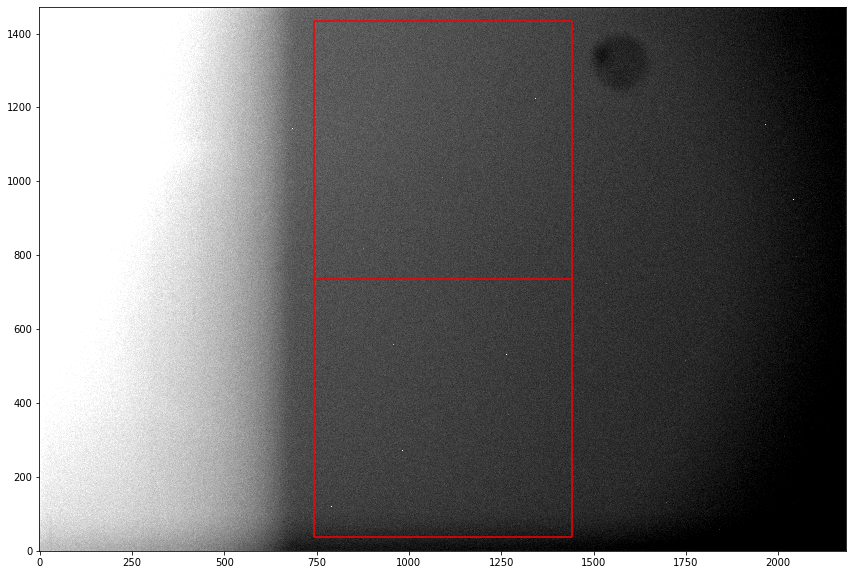

In [8]:
plt.figure(figsize=(20, 10))

plt.imshow(flatData, vmin=np.percentile(flatData, 5), vmax=np.percentile(flatData, 90),
           origin='lower', cmap='binary_r', interpolation='nearest')
# First region
plt.vlines(col1[-1], center, row2[-1], colors = 'r')
plt.vlines(col2[-1],center, row2[-1], colors = 'r')
plt.hlines(row2[-1], col1[-1], col2[-1], colors = 'r')

# Second Region
plt.vlines(col1[-1], row1[-1], center, colors = 'r')
plt.vlines(col2[-1], row1[-1], center, colors = 'r')
plt.hlines(row1[-1], col1[-1], col2[-1], colors = 'r')

plt.hlines(736, col1[-1], col2[-1], colors = 'r')

plt.savefig('fig1.png')

Now I will create a plot of the gain versus the number of pixels sampled in order to see what the appropriate smaple size is:

In [9]:
# Calculate the means for all the regions

for i, a in enumerate(sizeArray):

    sub_mean_f1 = np.mean(flatData[row1[i]:center, col1[i]:col2[i]])
    sub_mean_f2 = np.mean(flatData[center:row2[i], col1[i]:col2[i]])
    sub_mean_b1 = np.mean(biasData1[row1[i]:center, col1[i]:col2[i]])
    sub_mean_b2 = np.mean(biasData2[row1[i]:center, col1[i]:col2[i]])
    sub_sigma_f1f2 = np.std(flatData[row1[i]:center, col1[i]:col2[i]] - flatData[center:row2[i], col1[i]:col2[i]])
    sub_sigma_b1b2 = np.std(biasData1[row1[i]:center, col1[i]:col2[i]] - biasData2[row1[i]:center, col1[i]:col2[i]])
   
    sub_gain[i] = ((sub_mean_f1 + sub_mean_f2) - (sub_mean_b2 + sub_mean_b2)) / (sub_sigma_f1f2**2 - sub_sigma_b1b2**2) 
    sub_read_noise = sub_gain * sub_sigma_b1b2 / np.sqrt(2)

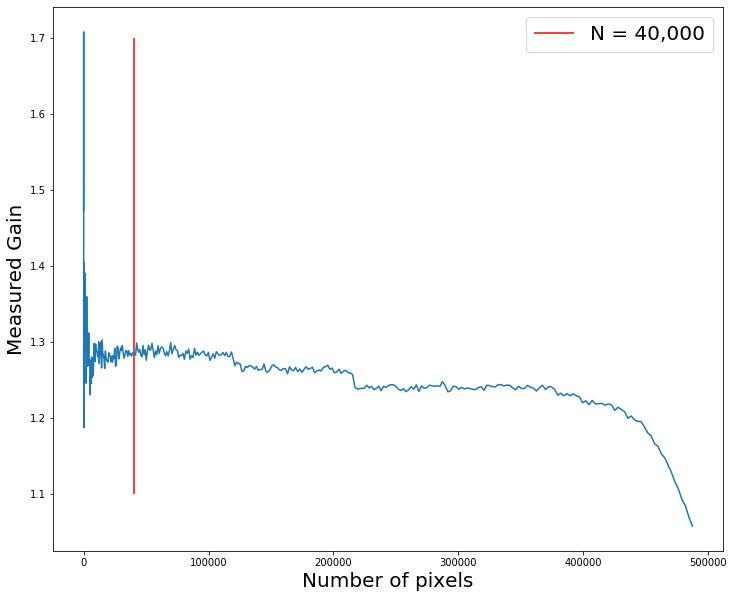

In [10]:
# Plot the means as a funcion of the pixels sampled
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12, 10)
x = sizeArray**2
plt.plot(x, sub_gain)
ax.set_xlabel('Number of pixels', fontsize = 20)
ax.set_ylabel('Measured Gain', fontsize = 20)
#plt.xscale('log')
ax.vlines(40000, 1.1, 1.7, colors = 'r', label = 'N = 40,000')
ax.legend(fontsize = 20)
plt.savefig('gainVsN.png')



Looks like for a flat exposure of 10 seconds, the gain is more or less constant for all N. This suggests that provided that N is greater than 100,000 the calculation of the gain will be correct.  
It's worth pointing out that for the longer exposures, even for the 5 second exposure, the gain falls off for larger values if N. Once the exposure time is greater than ~45 seconds, the values calculated for the gain become non sensical (gain ~50). 

In [11]:
gain = sub_gain[-1]

Now for the read noise. Read noise in ADU is: 

sigma_read = read_noise / gain

In [12]:
readNoise = sigmab1b2 / np.sqrt(2) 
print("The measured value of the gain is {0:0.4f} and the measured value of the read noise is {1:0.4f}".format(gain, readNoise))

The measured value of the gain is 1.0573 and the measured value of the read noise is 8.4379


The stated value of the gain is 1.3e<sup>-</sup>/ADU. The measured value presented above is in good agreement with this value.

### Linearity

Pretty much grab the mean and the exposure time and then plot them against each

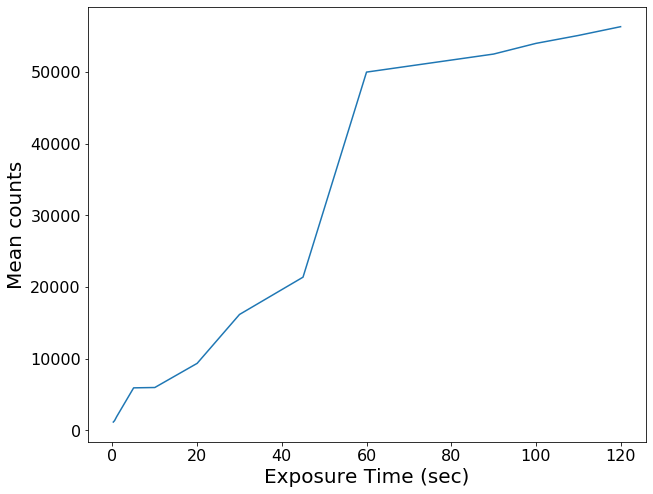

In [19]:
flat_list = glob.glob('data/Lab4/*Flat*.fits')
hdu = [fits.open(name) for name in flat_list]

# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)

    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means)
plt.xlabel('Exposure Time (sec)',  fontsize = 20)
plt.ylabel('Mean counts', fontsize = 20)
plt.savefig('linearity.png')
plt.show()


The detector looks linear from 0 up until around 40 seconds. Between 40 and 60 seconds the counts jump dramaticalltically from around 20,000 to 50,000. After 40 seconds the behavior is no longer linear.

__From a scientific standpoint why is it important to stay in the linear range of the CCD?__

It's important to stay within the linear range of the CCD in order to ensure that you can accurately calculate the flux from the counts measured by the CCD. If the image is allowed to exceed the linear range, then extrapolating the flux from the non linear portion, back through the linear portion is very  challenging and prone to errors which results in inaccurate data, and ultimately a waste of resources.

__In 1x1 binning what does the detector reach full well capacity or ADU saturation first?__

The CCD will reach full well capacity first. ADU saturation occurs at 2<sup>16</sup> = 65536 ADU which corresponds to around 85000 electrons. However the full well capacity of the CCD is around 77000 electrons. 85000 > 77000  

__What do you conclude about the linearity range of the detector?__

The detector stays linear up until around 20000 counts. After this it seems that the detector is no longer linear. Any use of this CCD should stay well below 20,000 counts in order to avoid saturated the CCD.

__Consider a different camera. It has 512 x 512 pixels (20 x 20 microns square). It has a 16-bit A/D converter, a gain of 1.6 e-/ADU, and a full-well capacity of ~150,000 electrons. With 1x1 binning, are we worried about exceeding full well capacity or about ADU saturation? What if we use 2x2 binning? Explain your answer.__  

With 1x1 binning we are worried about ADU saturation: 2<sup>16</sup> = 65536 ADU => 65536 * 1.6 e-/ADU  = 104857 e- < 150,000 e-. In 2x2 binning the full well capacity for every pixel is the same so the FW capacity for 4 pixels  4 x FW capacity for 1 pixel. However, now when the pixels are processed, all four pixels are counted together. For this reason we are still only worried about the ADU capacity as it is much less than 150000 * 4 / 1.6. 

__We were not using any filters in this exercise, and thus were testing the linearity across all wavelengths. How
would your answers to numbers 1 and 2 just above change if we were to use the UV filter? How about the IR
filter? Would your answers change? Would anything change? Explain__

Well, CCDs are the most sensitive in the optical range. This means that photons in the optical range are most efficiently converted to electrons. Therefore using either an UV or IR filter will cause the pixel to reach saturation slower than it would if measuring the full spectrum because the photons in these ranges aren't converted to electrons as efficiently. 

### Band Gap



In [21]:
import numpy as np
import matplotlib.pyplot as plt
# We will use the scipy curve_fit function to fit a model to data.
from scipy.optimize import curve_fit

In [22]:
t_cel = np.array([-15., -10., -8., -6., -4.2, -2.3, 0., 2., 
                3.6, 5.8, 8.2, 10., 12.8, 16.2, 20.])
adu = np.array([13, 15, 16, 17, 19, 22, 24, 28, 32, 37, 
                43, 50, 62, 89, 139])

In [23]:
t_kel = t_cel + 273
electrons = adu * 2.3
electrons_per_sec = electrons / 120
# The Boltzmann constant
k_b = 8.6175e-5

In [24]:

def dark_current(t_k, alpha, e_g):
    """
    Analytic expression for dark current as a function of temperature.
    
    Parameters
    ----------
    t_k : numpy.ndarray
        Temperature in Kelvin
    alpha : float
        Constant coefficient in front of exponential funtion.
    e_g : float
        Band gap energy in eV.
    
    Returns
    -------
    dark_current : numpy.ndarray
        Dark current in electrons/pixel/second.
    """
    dark_current = alpha * np.exp(-e_g / (2 * k_b * t_k))
    return dark_current

In [25]:
t_0 = t_kel[-1]
d_0 = electrons_per_sec[-1]

alpha_0 =  d_0 / np.exp(-1.1 / (2 * k_b * t_0))
e_g_0 = 1.1

In [26]:
p_opt, p_cov = curve_fit(dark_current, t_kel, electrons_per_sec, p0=[alpha_0, e_g_0])

# Errors in the fit
sig_alpha, sig_e_g = np.sqrt(np.diag(p_cov))

In [27]:
alpha_fit, e_g_fit = p_opt
print(alpha_fit)
print(e_g_fit, sig_e_g)

76088197177.4149
1.2192320840791062 0.06676295050822703


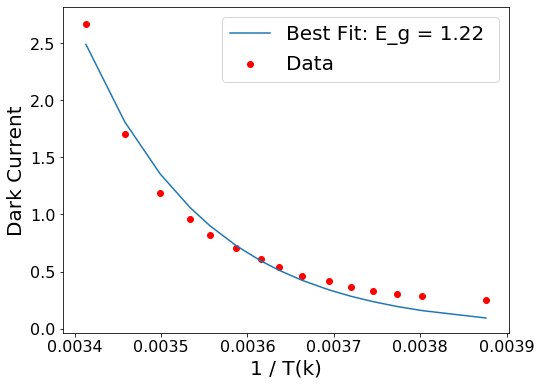

In [30]:

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
plt.plot(1/t_kel, dark_current(t_kel, alpha_fit, e_g_fit), label = 'Best Fit: E_g = 1.22 ')
plt.scatter(1/t_kel, electrons_per_sec, label = 'Data', color = 'r')
ax.legend(fontsize = 20)
axis = fig.gca()
ax.set_xlabel('1 / T(k)', fontsize = 20)
ax.set_ylabel('Dark Current', fontsize = 20) # Does this have to be in ADU's per second
plt.savefig('bandGap.png')

In [58]:
at_0 = dark_current(273, alpha_fit, e_g_fit)
print(at_0)

0.4242094657303839


__How does your derived value of the band gap compare to the value given for silicon? The given value is 1.1__  
The estimated value is 1.18 with a standard deviation of 0.06.  Given that the actual value for silicon is within 2 sigma of this result, I am confident that our result represents and accurate measurement.

__What will D converge to at high temperature? What will determine the upper temperature limit? What will determine the lower temperature limit?__

D will converge to infinity at high T because of the T^1.5 term. The upper limit of temperature on the chip at the most extreme is determined by the characteristics of the chip, at a somewhat less extreme the limit on temperature is determined by the environment the ccd is in. For data taking purposes the limit on the temperture is determined by the dark current; the higher the temperature the higher the dark current and the less effective the ccd will be at taking accurate data. The lower temperature limit will depend on what wavelength is being observed. different temperatures of the silicon provied different efficiencies at different wavelengths.

__The manufacturers given value of dark current at 0 degrees C is 1 e-/pixel/second. How does the measured value compare? Hypothesize reasons for any discrepency. How would you go about testing your hypothesis?__

The measured value for 0 degress is 0.4. This is not very close to the stated value. This may be because we are off by a small amount for either of the values of alpha or e_g in the dark current function which were estimated using a least squares regression. It may also be a result of our assumption that alpha was constant. The actual function for the dark current includes a T^1.5 term in front of the exponential that may influence the result a small amount. Aside from this the only other source of error is the measurment of the counts and the temperature of the ccd. We can test this hypothesis by verifying if a regression on a function that includes the temperature term has a better match with the expected value.

## Results

*Pretty straightforward*


## Resources
